In [2]:
# Ejercicio práctico riesgo longevidad
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import sys
import os
#sys.path.append(os.path.abspath('../src'))
from Tablas_mortalidad import *

In [5]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [6]:
ruta_m = r'C:/Users/Yessica García/Desktop/pj_sa_202402/src/TM_mujeres.xlsx'
ruta_h = r'C:/Users/Yessica García/Desktop/pj_sa_202402/src/TM_hombres.xlsx'
longevidad = r'C:/Users/Yessica García/Desktop/pj_sa_202402/src/datos_longevidad.xlsx'

In [7]:
Tmort_m = pd.read_excel(ruta_m)
Tmort_h = pd.read_excel(ruta_h)
T_hombre = TMensual(Tmort_h)
T_mujer = TMensual(Tmort_m)
data_long = pd.read_excel(longevidad,"Data")

In [8]:
print(data_long)

      Unnamed: 0  Edad  Casado Genero  Edad_pareja Sexo_pareja  Pago_mensual
0              1    68       0      M            0           0  4,196,583.06
1              2    67       1      H           67           H  1,983,941.40
2              3    80       1      H           77           H  4,014,628.81
3              4    71       1      H           85           M  5,710,179.97
4              5    66       0      M            0           0  7,882,172.76
...          ...   ...     ...    ...          ...         ...           ...
1195        1196    78       0      M            0           0  2,994,379.20
1196        1197    72       1      M           69           H  3,778,424.20
1197        1198    76       0      M            0           0  3,839,464.83
1198        1199    77       0      H            0           0 10,827,760.94
1199        1200    67       1      H           67           H  1,983,941.40

[1200 rows x 7 columns]


In [9]:
valoracion_jubilado =[]
valoracion_pareja=[]
i=0.04/12
for index, row in data_long.iterrows():

    genero = row['Genero']

    if genero =='H':
        tmort=T_hombre
    else:
        tmort=T_mujer

    if row['Casado']==0:

        #Renta Vitalicia
        edad=row['Edad']
        pago=row['Pago_mensual']
        T=tmort_filtered(tmort,edad)
        T['n'] = T['x'].apply(lambda x: x - edad)*12
        T['Vn'] = np.ones(len(T))*(1/(1+i))
        T['Vn'] = T.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        sum_vect=pago*T['Vn']*T['p(x)']
        va_jubilado=sum_vect.sum()
        va_pareja=0

        valoracion_jubilado.append(va_jubilado)
        valoracion_pareja.append(va_pareja)
        
    elif row['Casado']==1:

        #Renta vitalicia Reversible
        edad=row['Edad']
        pago=row['Pago_mensual']
        T=tmort_filtered(tmort,edad)
        T['n'] = T['x'].apply(lambda x: x - edad)*12
        T['Vn'] = np.ones(len(T))*(1/(1+i))
        T['Vn'] = T.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        sum_vect=pago*T['Vn']*T['p(x)']
        va_jubilado=sum_vect.sum()

        edad_pareja=row['Edad_pareja']
        genero_pareja=row['Sexo_pareja']
        if genero_pareja=='H':
            tmort_pareja=T_hombre
        else:
            tmort_pareja=T_mujer
            
        T_par=tmort_filtered(tmort_pareja,edad_pareja)
        T_par['n'] = T_par['x'].apply(lambda x: x - edad_pareja)*12
        T_par['Vn'] = np.ones(len(T_par))*(1/(1+i))
        T_par['Vn'] = T_par.apply(lambda row: row['Vn'] ** row['n'], axis=1)
        if edad<=edad_pareja:
            T_par['q(x)_Jub'] = T['q(x)'][:len(T_par)]
        else:
            lista=[]
            gap=(edad-edad_pareja)*12
            lista = list(T['q(x)'])+list(np.ones(gap))
            T_par['q(x)_Jub']=lista
            
        sum_vect_pareja=pago*T_par['Vn']*T_par['p(x)']*T_par['q(x)_Jub']
        va_pareja=sum_vect_pareja.sum()
        
        valoracion_jubilado.append(va_jubilado)
        valoracion_pareja.append(va_pareja)


C:\Users\Yessica García\AppData\Local\Temp\ipykernel_22020\2575191925.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T['n'] = T['x'].apply(lambda x: x - edad)*12
C:\Users\Yessica García\AppData\Local\Temp\ipykernel_22020\2575191925.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T['Vn'] = np.ones(len(T))*(1/(1+i))
C:\Users\Yessica García\AppData\Local\Temp\ipykernel_22020\2575191925.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [10]:
   
data_long['Valoracion Jubilado']=valoracion_jubilado
#data['Valoracion Jubilado']=data['Valoracion Jubilado'].apply(lambda x: x/1e3)
#data['Valoracion Jubilado']=data['Valoracion Jubilado'].apply(lambda x: f'{x:,.2f}')

data_long['Valoracion pareja']=valoracion_pareja
#data['Valoracion pareja']=data['Valoracion pareja'].apply(lambda x: x/1e3)
#data['Valoracion pareja']=data['Valoracion pareja'].apply(lambda x: f'{x:,.2f}')
data_long['Pago_mensual']=data_long['Pago_mensual'].apply(lambda x: f'{x:,.2f}')
data_long['Valoracion']=data_long['Valoracion Jubilado']+data_long['Valoracion pareja']

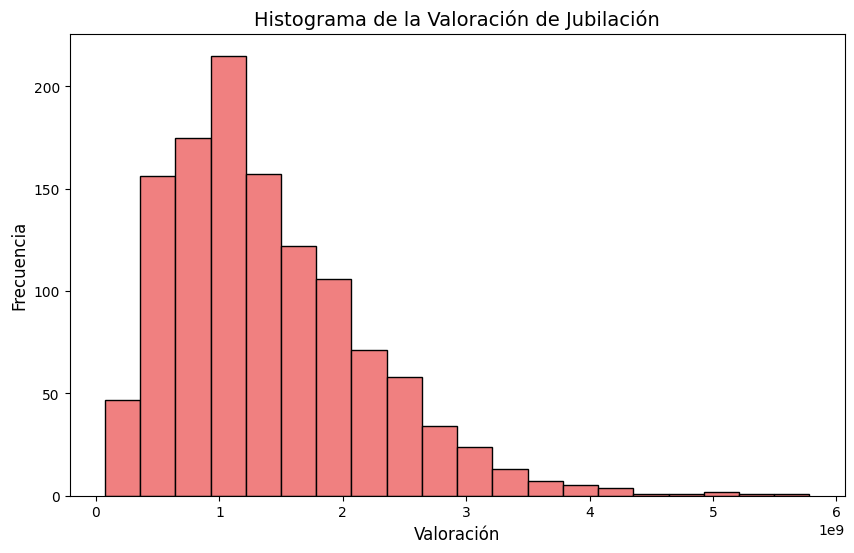

In [11]:
# Crear un histograma de la variable 'Valoracion' con color de relleno rojo suave
plt.figure(figsize=(10, 6))
plt.hist(data_long['Valoracion'], bins=20, color='lightcoral', edgecolor='black')

# Títulos y etiquetas
plt.title('Histograma de la Valoración de Jubilación', fontsize=14)
plt.xlabel('Valoración', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el histograma
plt.show()



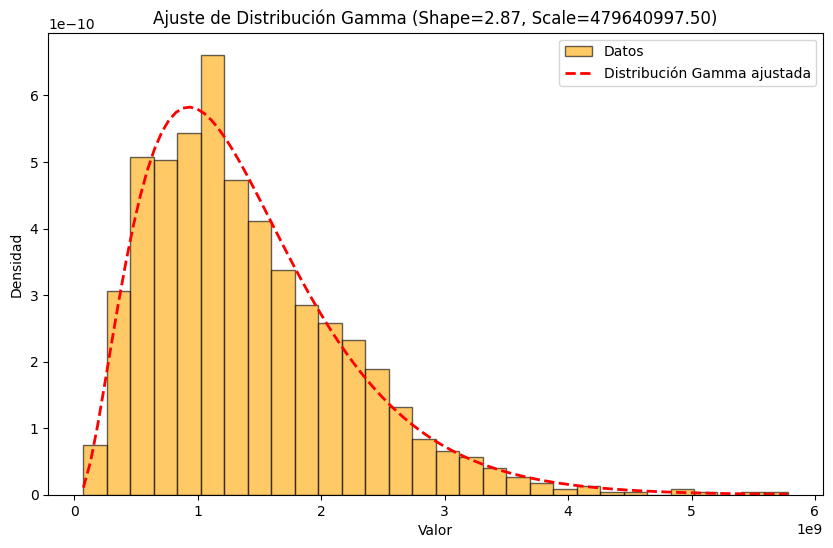

In [12]:
# Crear un rango de valores para la gráfica
x = np.linspace(min(data_long['Valoracion']), max(data_long['Valoracion']), 100)

# Ajustar la distribución gamma a los datos
shape, loc, scale = stats.gamma.fit(data_long['Valoracion'])

# Obtener la función de densidad ajustada
pdf_gamma_ajustada = stats.gamma.pdf(x, shape, loc, scale)

# Crear el histograma 
plt.figure(figsize=(10, 6))

# Graficar el histograma 
plt.hist(data_long['Valoracion'], bins=30, density=True, alpha=0.6, color='orange', edgecolor='black', label='Datos')

# Graficar la distribución gamma ajustada con línea discontinua
plt.plot(x, pdf_gamma_ajustada, 'r--', linewidth=2, label='Distribución Gamma ajustada')  

# Mostrar la gráfica
plt.title(f"Ajuste de Distribución Gamma (Shape={shape:.2f}, Scale={scale:.2f})")
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

#Clase 5 - continuidad del ejercicio

In [ ]:

# Definir el intervalo de confianza de la distribución al 5%
shape = 2.87  
scale = 479640997  

quantile_5 = stats.gamma.ppf(0.05, a=shape, scale=scale)  # Percent point function
quantile_95 = stats.gamma.ppf(0.95, a=shape, scale=scale)

print(f"Cuantil al 5%: {quantile_5}")
print(f"Cuantil al 95%: {quantile_95}")
#Rango

Cuantil al 5%: 360576647.60582757
Cuantil al 95%: 2926050013.444586


In [ ]:
# Paso 1: Calcular el valor total de la cartera
data_long['Valoracion'] = data_long['Valoracion Jubilado'] + data_long['Valoracion pareja']

# Paso 2: Calcular el valor total de la cartera
valor_total_cartera = data_long['Valoracion'].sum()

# Paso 3: Calcular el ahorro deseado (30% del valor total de la cartera)
ahorro_deseado = 0.30 * valor_total_cartera

In [37]:
print(ahorro_deseado)
print(valor_total_cartera)


506252650354.34235
1687508834514.4746


In [ ]:
# Agregar una nueva columna llamada "propuesta" con el 70% de la columna "Valoracion"
data_long['Propuesta'] = data_long['Valoracion'] * 0.7

# Verificar el resultado (puedes visualizar las primeras filas o mostrar todo el DataFrame)
print(data_long.head(10))


   Unnamed: 0  Edad  Casado Genero  Edad_pareja Sexo_pareja   Pago_mensual  \
0           1    68       0      M            0           0   4,196,583.06   
1           2    67       1      H           67           H   1,983,941.40   
2           3    80       1      H           77           H   4,014,628.81   
3           4    71       1      H           85           M   5,710,179.97   
4           5    66       0      M            0           0   7,882,172.76   
5           6    83       0      M            0           0   4,168,962.19   
6           7    79       1      M           75           H   3,093,998.47   
7           8    81       1      M           77           M  13,838,688.19   
8           9    75       0      M            0           0   3,507,135.28   
9          10    81       1      H           59           M   5,767,559.72   

   Valoracion Jubilado  Valoracion pareja       Valoracion        propuesta  
0     1,017,456,036.16               0.00 1,017,456,036.16   71

In [ ]:
###La probabilidad de aceptación de esta propuesta se comporta como una distribución Binomial de parámetro P

df_sim = pd.DataFrame()
df_sim['key'] = list(data_long.index)
df_sim['Valoracion'] = list(data_long['Valoracion'])

# Le daremos a cada persona el 70% del valor de la renta
d = 0.7
df_sim['Pago_hoy'] = (d) * df_sim['Valoracion']

sim = 500
p = 0.35 #valor de aceptación mínimo

for i in range(500):  # Genera 500 simulaciones
    # Genera las muestras de la distribución Binomial
    samples = np.random.binomial(1, p, len(df_sim))  # b(n,p,size)
    
    # Crea la nueva columna para la simulación
    df_sim['sim_' + str(i)] = samples

    # Aplica la lógica a cada fila:
    # Si el valor de la simulación es 1, toma 'Pago_hoy'; si es 0, toma 'Valoracion'
    df_sim['sim_' + str(i)] = df_sim.apply(
        lambda row: row['Pago_hoy'] if row['sim_' + str(i)] == 1 else row['Valoracion'], axis=1
    )



C:\Users\Yessica García\AppData\Local\Temp\ipykernel_22020\589538514.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sim['sim_' + str(i)] = samples
C:\Users\Yessica García\AppData\Local\Temp\ipykernel_22020\589538514.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sim['sim_' + str(i)] = samples
C:\Users\Yessica García\AppData\Local\Temp\ipykernel_22020\589538514.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance. 

In [73]:
df_sim

,key,Valoracion,Pago_hoy,sim_0,sim_1,sim_2,sim_3,sim_4,sim_5,sim_6,...,sim_490,sim_491,sim_492,sim_493,sim_494,sim_495,sim_496,sim_497,sim_498,sim_499
0,0,"1,017,456,036.16","712,219,225.31","1,017,456,036.16","1,017,456,036.16","712,219,225.31","1,017,456,036.16","712,219,225.31","1,017,456,036.16","712,219,225.31",...,"712,219,225.31","1,017,456,036.16","1,017,456,036.16","1,017,456,036.16","1,017,456,036.16","712,219,225.31","1,017,456,036.16","1,017,456,036.16","1,017,456,036.16","1,017,456,036.16"
1,1,"489,770,074.95","342,839,052.47","489,770,074.95","342,839,052.47","342,839,052.47","342,839,052.47","489,770,074.95","342,839,052.47","489,770,074.95",...,"489,770,074.95","489,770,074.95","489,770,074.95","342,839,052.47","489,770,074.95","489,770,074.95","489,770,074.95","342,839,052.47","489,770,074.95","489,770,074.95"
2,2,"881,797,559.19","617,258,291.44","617,258,291.44","881,797,559.19","881,797,559.19","881,797,559.19","617,258,291.44","617,258,291.44","617,258,291.44",...,"881,797,559.19","881,797,559.19","881,797,559.19","881,797,559.19","881,797,559.19","617,258,291.44","617,258,291.44","881,797,559.19","881,797,559.19","881,797,559.19"
3,3,"1,346,681,022.89","942,676,716.02","1,346,681,022.89","1,346,681,022.89","1,346,681,022.89","1,346,681,022.89","942,676,716.02","1,346,681,022.89","942,676,716.02",...,"1,346,681,022.89","942,676,716.02","1,346,681,022.89","1,346,681,022.89","942,676,716.02","1,346,681,022.89","942,676,716.02","942,676,716.02","942,676,716.02","1,346,681,022.89"
4,4,"1,946,327,113.36","1,362,428,979.36","1,946,327,113.36","1,362,428,979.36","1,946,327,113.36","1,946,327,113.36","1,946,327,113.36","1,362,428,979.36","1,946,327,113.36",...,"1,362,428,979.36","1,946,327,113.36","1,362,428,979.36","1,362,428,979.36","1,946,327,113.36","1,362,428,979.36","1,362,428,979.36","1,362,428,979.36","1,362,428,979.36","1,946,327,113.36"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1195,"640,482,469.74","448,337,728.82","640,482,469.74","640,482,469.74","640,482,469.74","448,337,728.82","448,337,728.82","640,482,469.74","640,482,469.74",...,"640,482,469.74","448,337,728.82","640,482,469.74","448,337,728.82","640,482,469.74","640,482,469.74","640,482,469.74","640,482,469.74","448,337,728.82","640,482,469.74"
1196,1196,"913,985,755.27","639,790,028.69","639,790,028.69","913,985,755.27","913,985,755.27","913,985,755.27","913,985,755.27","913,985,755.27","913,985,755.27",...,"913,985,755.27","913,985,755.27","639,790,028.69","913,985,755.27","913,985,755.27","639,790,028.69","913,985,755.27","913,985,755.27","913,985,755.27","913,985,755.27"
1197,1197,"846,745,509.27","592,721,856.49","846,745,509.27","592,721,856.49","592,721,856.49","846,745,509.27","846,745,509.27","846,745,509.27","592,721,856.49",...,"846,745,509.27","846,745,509.27","592,721,856.49","846,745,509.27","846,745,509.27","846,745,509.27","592,721,856.49","846,745,509.27","592,721,856.49","846,745,509.27"
1198,1198,"2,348,062,669.86","1,643,643,868.90","1,643,643,868.90","2,348,062,669.86","2,348,062,669.86","1,643,643,868.90","1,643,643,868.90","2,348,062,669.86","2,348,062,669.86",...,"2,348,062,669.86","2,348,062,669.86","1,643,643,868.90","2,348,062,669.86","2,348,062,669.86","2,348,062,669.86","2,348,062,669.86","2,348,062,669.86","2,348,062,669.86","1,643,643,868.90"


In [74]:
cols = [col for col in df_sim.columns if 'sim_' in col]
resp = df_sim[cols].sum()

In [75]:
resp

sim_0     1,509,296,386,059.44
sim_1     1,507,042,600,738.58
sim_2     1,509,681,600,832.91
sim_3     1,516,412,716,852.18
sim_4     1,503,129,516,795.00
                  ...         
sim_495   1,510,921,325,965.64
sim_496   1,517,036,949,471.05
sim_497   1,520,123,765,519.83
sim_498   1,505,546,300,350.67
sim_499   1,506,860,336,904.68
Length: 500, dtype: float64

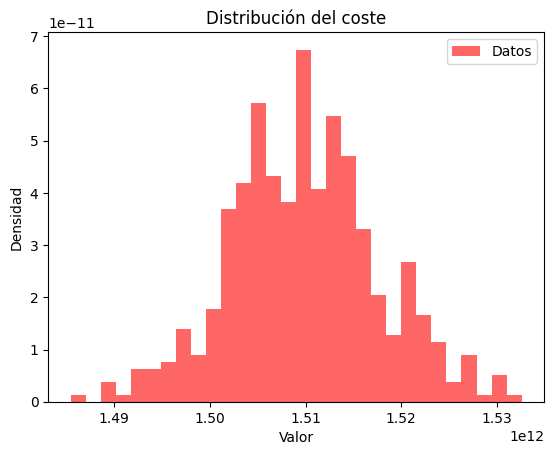

In [76]:
# Graficar el histograma de los datos
plt.hist(resp, bins=30, density=True, alpha=0.6, color='r', label='Datos')

# Mostrar la gráfica
plt.title("Distribución del coste")
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()



In [77]:
# Calcular el cuartil al 95%
cuartil_95 = np.percentile(resp, 95)

# Mostrar el resultado
print(f"El cuartil al 95% es: {cuartil_95}")


El cuartil al 95% es: 1523127258613.1047


In [78]:
ahorro_deseado

506252650354.34235

In [79]:
valor_total_cartera

1687508834514.4746

In [80]:
cuartil_95

1523127258613.1047

In [81]:
ahorro = valor_total_cartera - cuartil_95
print(ahorro)

164381575901.36987


In [83]:
porcentaje=ahorro/valor_total_cartera
print('El porcentaje de igualdad es de',porcentaje)

El porcentaje de igualdad es de 0.09741079426625063


Se calculó el valor total de las rentas vitalicias por cada persona en la cartera, tomando en cuenta su edad, sexo, y si están casados o no. Esto nos permitió obtener un total comprometido por las rentas vitalicias que el banco debe manejar.

La propuesta del banco es ofrecer un monto establecido hoy a los asegurados. Para calcular el porcentaje de aceptación, es necesario simular distintas tasas de aceptación (probabilidad de que una persona acepte el pago único).

Se realizó una distribución binomial de las decisiones de aceptación, generando 500 simulaciones para ver cómo varía el ahorro total de la cartera dependiendo del porcentaje de aceptación.

Se calculó cuánto ahorra el banco bajo cada escenario de aceptación. Este ahorro se comparó con el valor total comprometido por las rentas vitalicias. El objetivo fue lograr un ahorro de al menos el 30% del total comprometido.

Al realizar este análisis y simular el ahorro para la propuesta de pensión, se le propone al banco que el valor de aceptación mínimo para la propuesta debe ser aproximadamente del 35%. Este porcentaje asegura que se acerquen los ahorros al valor esperado.